# 9 : Tree based methods 

binary tree 

In [1]:
#load the library for svm
library(e1071) 
library(caret) # to train the model
library(MASS)
library(tidyverse)

Loading required package: ggplot2

Loading required package: lattice

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()
x dplyr::select() masks MASS::select()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Boston 데이터셋의 설명을 간단히 정리해줄게! 이 데이터셋은 보스턴 주택 가격에 영향을 미치는 다양한 요인들을 포함하고 있어. 데이터셋의 각 변수는 아래와 같은 의미를 가지고 있어:

crim: 범죄율 (per capita crime rate by town)

zn: 25,000 평방피트 이상의 거주 지역 비율 (proportion of residential land zoned for lots over 25,000 sq. ft)

indus: 비소매 상업 지역 비율 (proportion of non-retail business acres per town)

chas: 찰스강 경계 여부 (1이면 강 인접, 0이면 인접하지 않음) (Charles River dummy variable; 1 if tract bounds river; 0 otherwise)

nox: 질소 산화물 농도 (10 ppm 단위) (nitrogen oxides concentration (parts per 10 million))

rm: 주거지당 방의 평균 개수 (average number of rooms per dwelling)

age: 1940년 이전에 지어진 자택의 비율 (proportion of owner-occupied units built prior to 1940)

dis: 5개의 보스턴 고용 센터까지의 가중 거리 (weighted distances to five Boston employment centres)

rad: 고속도로 접근성 지수 (index of accessibility to radial highways)

tax: 재산세율 (10,000달러당) (full-value property-tax rate per $10,000)

ptratio: 타운별 학생-교사 비율 (pupil-teacher ratio by town)

black: 1000(Bk - 0.63)^2, 여기서 Bk는 흑인 비율 (proportion of Black population by town)

lstat: 낮은 사회적 지위를 가진 인구의 비율 (percentage of lower status of the population)

medv: 자가 주택의 중앙값 (보스턴 주택의 중앙값, $1000s 단위) (Median value of owner-occupied homes in $1000s)
이 데이터는 회귀 분석을 통해 주택 가격에 영향을 미치는 주요 요인을 분석할 때 자주 사용되는 데이터셋이야.

In [2]:
data(Boston)
str(Boston)
set.seed(252)

index = createDataPartition(Boston$medv, p = 0.8, list = FALSE)
train.dat = Boston[index,]
test.dat = Boston[-index,]


'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


[1] 3.265095

[1] 4.637794

[1] 0.7351787

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


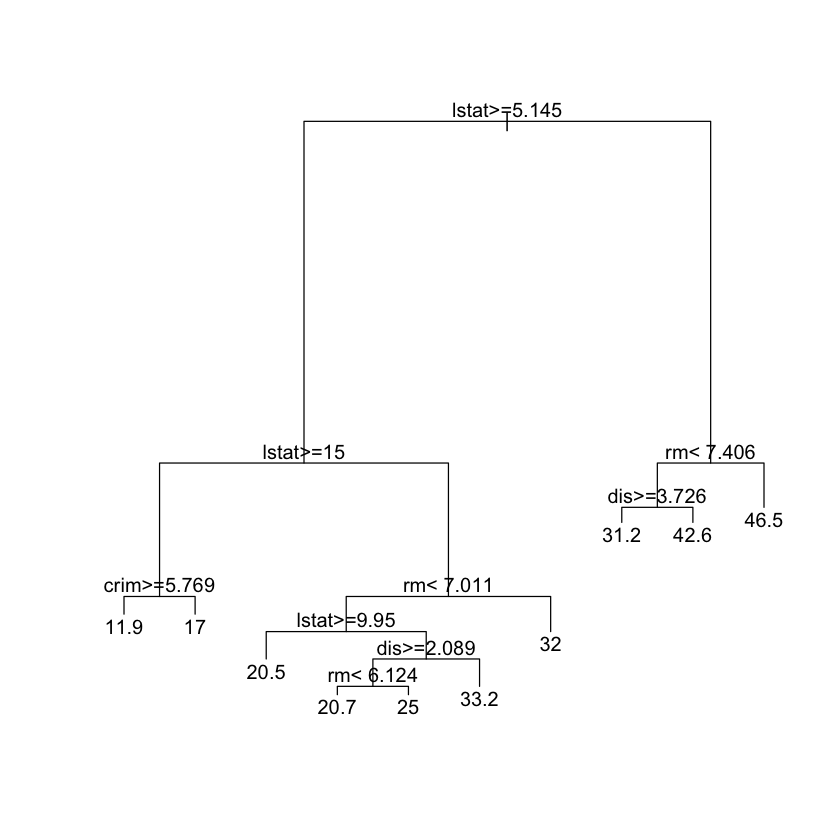

In [3]:
#rpart : recursive partitioning and regression trees
library(rpart)

#build a CART on the training data
fit.rpart = rpart(medv ~ ., data = train.dat)

# To show the regression tree
plot(fit.rpart)
text(fit.rpart, digits = 3)

#make predict on the testing data
yhat = predict(fit.rpart, newdata = test.dat)

#find the MAE (mean absolute error) on the testing data

caret ::MAE(test.dat$medv,yhat)
caret ::RMSE(test.dat$medv,yhat)
caret ::R2(test.dat$medv,yhat)

train.dat[2,]

# no : right side
# yes : left side


CART 

407 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 367, 366, 367, 366, 367, 365, ... 
Resampling results across tuning parameters:

  cp     RMSE      Rsquared   MAE     
  1e-06  4.402098  0.7590736  3.000907
  2e-04  4.402098  0.7590736  3.000907
  1e-03  4.412117  0.7590834  2.979013
  2e-03  4.418661  0.7580291  2.971244

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 2e-04.

,cp
,<dbl>
2,2e-04


[1] 3.265095

[1] 4.637794

[1] 0.7351787

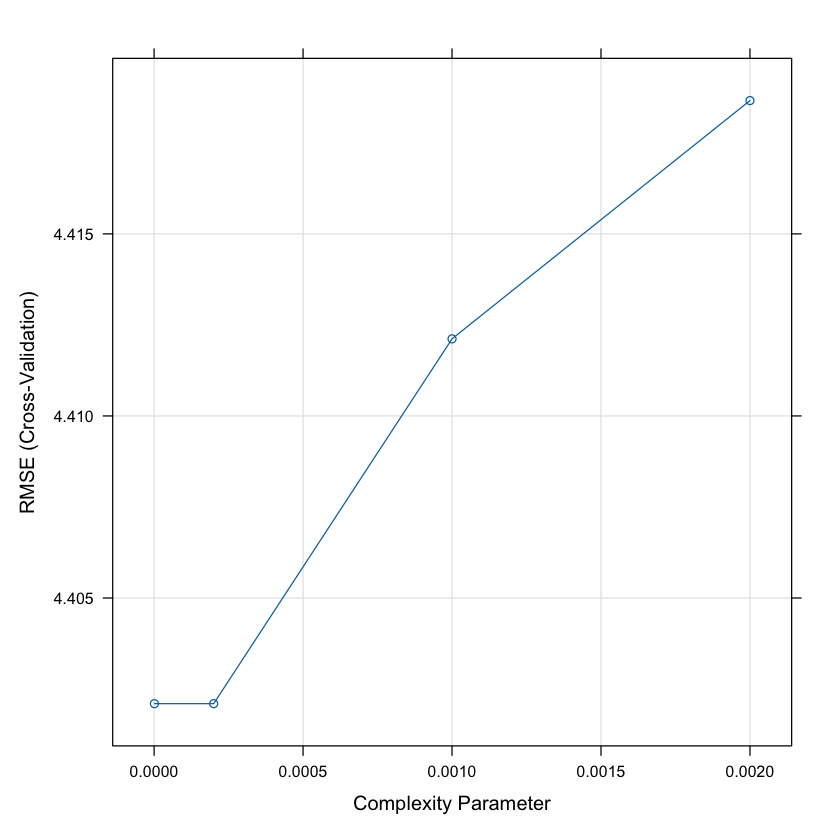

In [4]:
#select the optimal CP (tuning parameter) using R train function 

set.seed(527)
#cross valiation : 10 folder cross validation 
ctrl = trainControl(method = "cv", number = 10)

#tuning parameter : the complexity parameter(cp), 
#which impose a penalty to the tree for having two many splits.
# the default value is 0.01. the smaller the cp, the larger the tree
# the larger the cp, the smaller the tree
# A too small value of cp leads to overfitting and a too large cp will a too simple tree. both cases decrease the accuracy of the model
# an optimal cp value can be estimated by testing different cp values and using cross-validation approach

#to create the searching grid
tgrid = expand.grid (
    cp=c(0.000001,0.0002,0.001,0.002)
)

fit.rpart1 = train(medv~., data=train.dat,
                   method="rpart",
                   trControl=ctrl,
                   tuneGrid=tgrid)  
fit.rpart1

#the best tuning parameter 
fit.rpart1$bestTune

plot(fit.rpart1) #cp and RMSE

caret ::MAE(test.dat$medv,yhat)
caret ::RMSE(test.dat$medv,yhat)
caret ::R2(test.dat$medv,yhat)

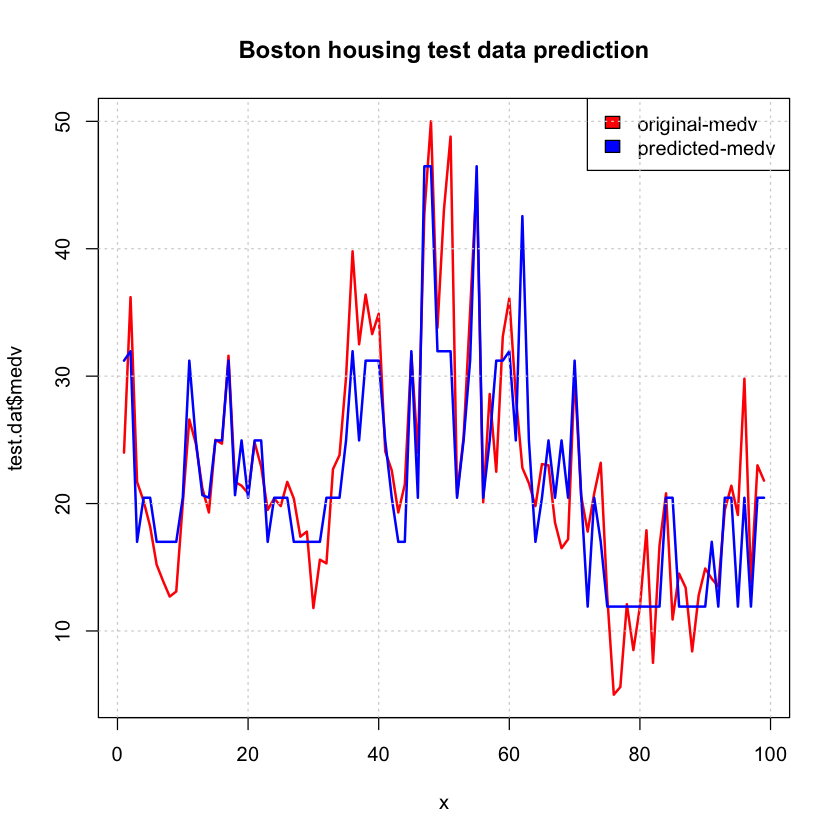

In [5]:
# line plots to see the performance
# predicted value vs observed values

x = 1:length(yhat)
plot(x, test.dat$medv,col="red",type = "l",lwd=2, 
    main = "Boston housing test data prediction")
lines(x,yhat,col="blue",lwd=2)
legend("topright",legend=c("original-medv","predicted-medv"),
        fill = c("red","blue"),col=2:3, adj=c(0,0.6))
grid()

# CART for classification 

example : 


The purpose is to construct a predictive model to predict if a person has "diabetes" or not based on all other features in the data. 

Response : diabetes ( neg or positive)
a binary classification problem. 

data(PimaIndianDiabetes2)

In [6]:
library(caret) #ML model building package
library(MASS) #modern applied statistics with S
#library(randomForest)

library(mlbench)
data(PimaIndiansDiabetes)
dat = PimaIndiansDiabetes
str(dat)


'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


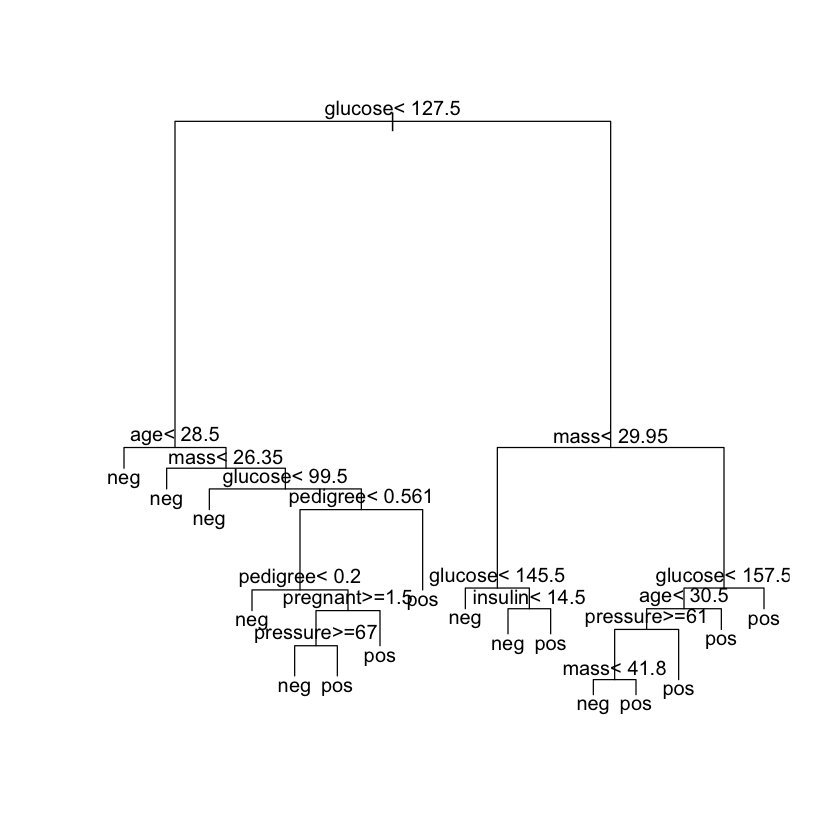

In [7]:
#build a CART on the training data

library(rpart)
fit.rpart = rpart(diabetes ~ ., data = dat)

# To show the regression tree
plot(fit.rpart)
text(fit.rpart, digits = 3)

# #make predict on the testing data
# #yhat = predict(fit.rpart, newdata = test.dat)

# #find the MAE (mean absolute error) on the testing data

# caret ::MAE(test.dat$medv,yhat)
# caret ::RMSE(test.dat$medv,yhat)
# caret ::R2(test.dat$medv,yhat)

# train.dat[2,]

In [8]:
#make a predict on the data

yhat= predict(fit.rpart, newdata = dat,type = "class")

#confusion matrix 
#table(yhat, dat$diabetes) #simple but not informative

confusionMatrix(yhat, reference = dat$diabetes)



Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg 449  72
       pos  51 196
                                         
               Accuracy : 0.8398         
                 95% CI : (0.812, 0.8651)
    No Information Rate : 0.651          
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.641          
                                         
 Mcnemar's Test P-Value : 0.07133        
                                         
            Sensitivity : 0.8980         
            Specificity : 0.7313         
         Pos Pred Value : 0.8618         
         Neg Pred Value : 0.7935         
             Prevalence : 0.6510         
         Detection Rate : 0.5846         
   Detection Prevalence : 0.6784         
      Balanced Accuracy : 0.8147         
                                         
       'Positive' Class : neg            
                                         

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg 449  72
       pos  51 196
                                         
               Accuracy : 0.8398         
                 95% CI : (0.812, 0.8651)
    No Information Rate : 0.651          
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.641          
                                         
 Mcnemar's Test P-Value : 0.07133        
                                         
            Sensitivity : 0.8980         
            Specificity : 0.7313         
         Pos Pred Value : 0.8618         
         Neg Pred Value : 0.7935         
             Prevalence : 0.6510         
         Detection Rate : 0.5846         
   Detection Prevalence : 0.6784         
      Balanced Accuracy : 0.8147         
                                         
       'Positive' Class : neg            
                                         

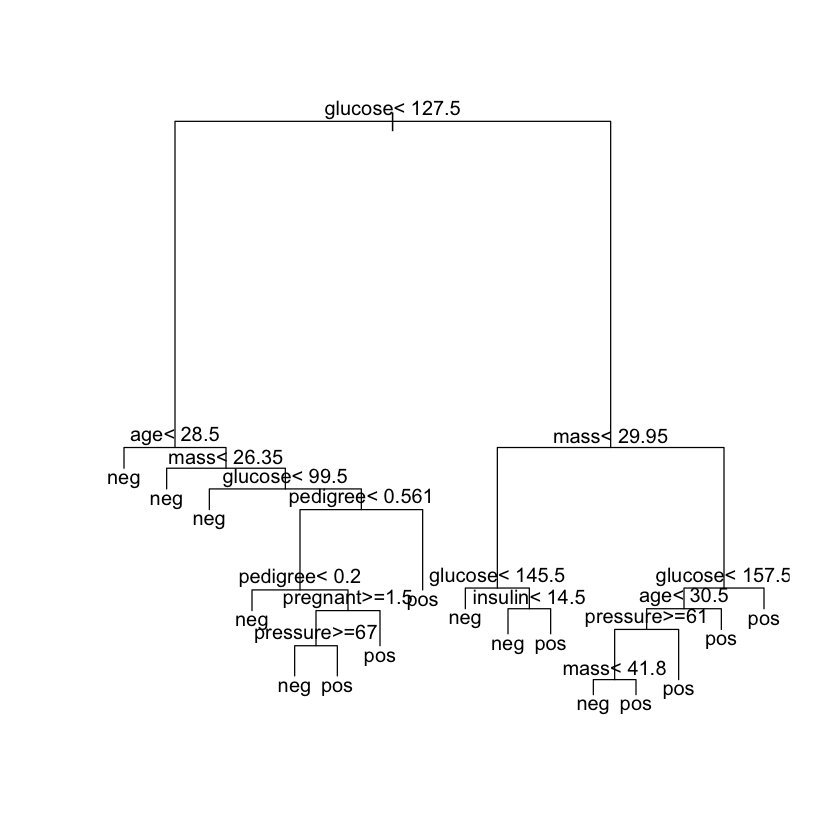

In [9]:
cntrl = rpart.control(minsplit = 20, minbucket = 5, maxdepth = 20)
fit = rpart(diabetes ~ ., data = dat, method = "class",control = cntrl)

plot(fit)
text(fit, digits = 3)

#make a predict on the data
yhat = predict(fit, newdata = dat, type = "class")

#confusion matrix
confusionMatrix(yhat, reference = dat$diabetes)

In [10]:
library(caret)

dat=PimaIndiansDiabetes
set.seed(252)

index = createDataPartition(dat$diabetes, p = 0.8, list = FALSE)
train.dat=dat[index,]
test.dat=dat[-index,]


Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  88   7
       pos  12  46
                                          
               Accuracy : 0.8758          
                 95% CI : (0.8129, 0.9236)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 3.566e-10       
                                          
                  Kappa : 0.7317          
                                          
 Mcnemar's Test P-Value : 0.3588          
                                          
            Sensitivity : 0.8800          
            Specificity : 0.8679          
         Pos Pred Value : 0.9263          
         Neg Pred Value : 0.7931          
             Prevalence : 0.6536          
         Detection Rate : 0.5752          
   Detection Prevalence : 0.6209          
      Balanced Accuracy : 0.8740          
                                          
       'Positive' Class : neg             
                              

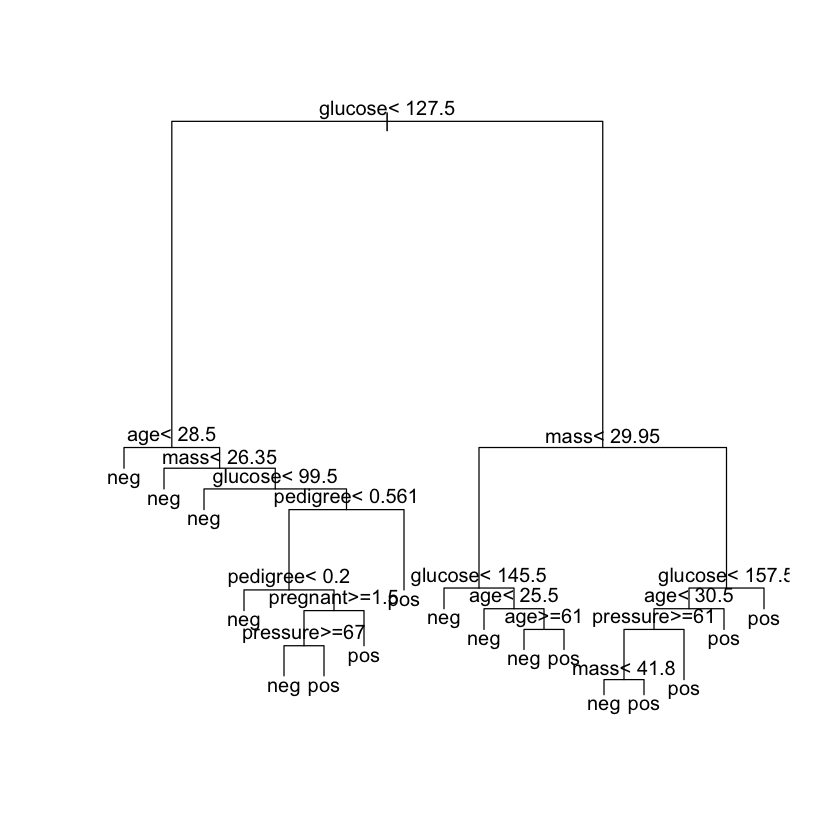

In [11]:
cntrl = rpart.control(minsplit = 10, minbucket = 3, maxdepth = 20)
fit = rpart(diabetes ~ ., data = dat, method = "class",control = cntrl)

plot(fit)
text(fit, digits = 3)

#make a predict on the data
yhat = predict(fit, newdata = test.dat, type = "class")

#confusion matrix
confusionMatrix(yhat, reference = test.dat$diabetes)

In [12]:
library(caret)

# Cross-validation : 10 folder cross validation
set.seed(527)
ctrl <- trainControl(method = "cv", number = 10)

# cp 값에 대한 grid 설정
cp_grid <- expand.grid(cp = seq(0.01, 0.1, by = 0.01))

# rpart 모델 학습
fit.rpart1 <- train(
  diabetes ~ ., 
  data = train.dat, 
  method = "rpart", 
  trControl = ctrl, 
  tuneGrid = cp_grid
)

print(fit.rpart1)


CART 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 553, 553, 553, 554, 553, 554, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.01  0.7381015  0.4069007
  0.02  0.7348493  0.3974419
  0.03  0.7283184  0.3369999
  0.04  0.7250925  0.3165948
  0.05  0.7251719  0.3166013
  0.06  0.7251719  0.3166013
  0.07  0.7251719  0.3166013
  0.08  0.7251719  0.3166013
  0.09  0.7251719  0.3166013
  0.10  0.7251719  0.3166013

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01.


# Ensemble models 

## Bagging (Bootstrap aggregation) 
## Bootstrap 


In [13]:
# R codes for bagging 

library(ipred)

set.seed(123)

#train bagged model
#"minsplit" : the parameter determines the minimum number of observations that must exist in a node in order for a split to be attempted
fit.bag1 = bagging(diabetes ~ ., data = train.dat, nbagg=100, coob = TRUE,
                     control = rpart.control(minsplit = 2, cp=0))

#accuracy is improved a bit

#make a predict on the testing data
yhat = predict(fit.bag1, newdata = test.dat)

#confusion matrix
confusion.mat = confusionMatrix(yhat, reference = test.dat$diabetes)
confusion.mat

#variable importance
varImp(fit.bag1)

#
# plot(fit.bag1)

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  82  15
       pos  18  38
                                          
               Accuracy : 0.7843          
                 95% CI : (0.7106, 0.8466)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 0.0003018       
                                          
                  Kappa : 0.5299          
                                          
 Mcnemar's Test P-Value : 0.7277235       
                                          
            Sensitivity : 0.8200          
            Specificity : 0.7170          
         Pos Pred Value : 0.8454          
         Neg Pred Value : 0.6786          
             Prevalence : 0.6536          
         Detection Rate : 0.5359          
   Detection Prevalence : 0.6340          
      Balanced Accuracy : 0.7685          
                                          
       'Positive' Class : neg             
                              

,Overall
,<dbl>
age,128.94678
glucose,168.70601
insulin,61.75409
mass,151.46212
pedigree,113.85009
pregnant,102.89872
pressure,86.92694
triceps,70.15543


In [14]:
# use the train function in caret package 
# to select the optimal number of trees

set.seed(527)
ctrl <- trainControl(method = "cv", number = 10)

# Bagging 모델 학습
fit.bagging <- train(
  diabetes ~ ., 
  data = train.dat, 
  method = "treebag", 
  trControl = ctrl
)

print(fit.bagging)

# train a bagging model 
fit.bagging2 <- train(
  diabetes ~ ., 
  data = train.dat, 
  method = "treebag", 
  trControl = ctrl, 
  nbagg = 50 # 트리 개수 설정
)

print(fit.bagging2)

Bagged CART 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 553, 553, 553, 554, 553, 554, ... 
Resampling results:

  Accuracy  Kappa    
  0.728477  0.3882905

Bagged CART 

615 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 554, 554, 554, 553, 554, 553, ... 
Resampling results:

  Accuracy   Kappa    
  0.7431518  0.4184012



### Practice : build a predictive model using bagging to predict "species" in iris data

1. split the data 
2. using the train data, build a rpart model 
3. using bagging function 
4. using caret train function.
5. compare the accuracy on the testing data



# Ramdom forests 

In [15]:
library(randomForest)

set.seed(242)
fit.randomf = randomForest(diabetes ~., data = train.dat)
fit.randomf

yhat = predict(fit.randomf, newdata = test.dat) 

confusion.mat= confusionMatrix(yhat, reference = test.dat$diabetes)
confusion.mat

# variable importance
varImp(fit.randomf)


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin





Call:
 randomForest(formula = diabetes ~ ., data = train.dat) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 25.2%
Confusion matrix:
    neg pos class.error
neg 342  58   0.1450000
pos  97 118   0.4511628

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  84  10
       pos  16  43
                                         
               Accuracy : 0.8301         
                 95% CI : (0.761, 0.8859)
    No Information Rate : 0.6536         
    P-Value [Acc > NIR] : 9.866e-07      
                                         
                  Kappa : 0.6344         
                                         
 Mcnemar's Test P-Value : 0.3268         
                                         
            Sensitivity : 0.8400         
            Specificity : 0.8113         
         Pos Pred Value : 0.8936         
         Neg Pred Value : 0.7288         
             Prevalence : 0.6536         
         Detection Rate : 0.5490         
   Detection Prevalence : 0.6144         
      Balanced Accuracy : 0.8257         
                                         
       'Positive' Class : neg            
                                         

,Overall
,<dbl>
pregnant,25.28675
glucose,71.54319
pressure,25.76633
triceps,19.92468
insulin,18.45137
mass,43.72119
pedigree,34.99789
age,38.31519


# Random forest for regression 

example : to construct a random forest model to predict " housing price" in Boston housing data using all features. 

In [16]:
# use randomforest to build a model to predict "house price" using other variables in the data

#use the Boston data
library(MASS)
library(tidyverse)
library(caret) #data partition
library(randomForest)

data(Boston)
str(Boston)

set.seed(252)

index = createDataPartition(Boston$medv, p = 0.8, list = FALSE)
train.dat = Boston[index,]
test.dat = Boston[-index,]



'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...



Call:
 randomForest(formula = medv ~ ., data = train.dat) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 10.822
                    % Var explained: 87.33

[1] 2.855321

,Overall
,<dbl>
crim,1997.7488
zn,208.2695
indus,1852.8839
chas,277.1691
nox,2387.4654
rm,8673.7852
age,994.3108
dis,2203.7450
rad,278.9610


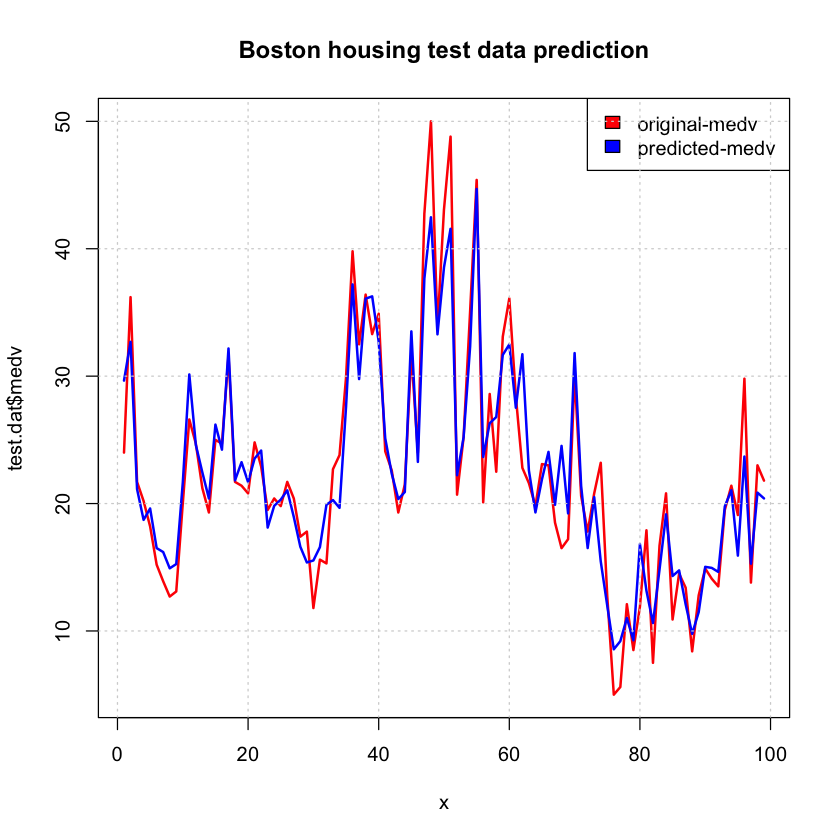

In [17]:
set.seed(3523)
fit.randomf = randomForest(medv ~ ., data = train.dat)
fit.randomf

yhat = predict(fit.randomf, newdata = test.dat)

# confusion.mat = confusionMatrix(yhat, reference = test.dat$medv)
# confusion.mat

#RMSE
caret::RMSE(test.dat$medv,yhat)

# variable importance
varImp(fit.randomf)


# LINE PLOTS TO see the performance
#predicted value vs observed values

x = 1:length(yhat)
plot(x, test.dat$medv, col = "red", type = "l", lwd = 2,
     main = "Boston housing test data prediction")
lines(x, yhat, col = "blue", lwd = 2)

legend("topright", legend = c("original-medv", "predicted-medv"),
       fill = c("red", "blue"), col = 2:3, adj = c(0, 0.6))
grid()

In [18]:
#Model tuning via R caret train function 
set.seed(738)
#mtry : the number of variables to randomly sample as condidates at each split.
# when myry = the number of features. the random forest model equates to bagging.

tune.grid = expand.grid(.mtry=1:10)
trcn = trainControl(method = "cv", number = 5) 

#train a rf model by selecting the optimal tuning parameter
rf.fit2 = train(medv~., data=train.dat,
                method="rf",
                trControl=trcn,
                tuneGrid=tune.grid)



In [19]:
rf.fit2 # training data

rf.fit2$bestTune

Random Forest 

407 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 325, 326, 325, 326, 326 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
   1    4.734813  0.7856232  3.090534
   2    3.882397  0.8389062  2.472070
   3    3.632521  0.8541864  2.331694
   4    3.598002  0.8525293  2.315173
   5    3.495382  0.8606158  2.263313
   6    3.461341  0.8627470  2.260536
   7    3.441950  0.8623037  2.255286
   8    3.412840  0.8640846  2.239393
   9    3.466572  0.8601986  2.273762
  10    3.435714  0.8626859  2.264033

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 8.

,mtry
,<int>
8,8


In [20]:
yhat = predict(rf.fit2,test.dat) #testing data

#RMSE

caret::RMSE(test.dat$medv,yhat)

# which is better than the random forest model without tuning 

[1] 2.730658

# GBM model (gradient boosting machines)

In [21]:
library(caret)
library(mlbench)
library(MASS)
library(randomForest)

In [22]:
data(PimaIndiansDiabetes)
dat = PimaIndiansDiabetes
str(dat)

set.seed(252)

index = createDataPartition(dat$diabetes, p = 0.8, list = FALSE)
train.dat = dat[index,]
test.dat = dat[-index,]

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [31]:
library(gbm)
# model tuning via R caret train function
set.seed(738)

#shrinkage : the learning rate of the boosting algorithm
#interaction.depth : the maximum depth of the tree
#n.minobsinnode : the minimum number of observations in the terminal nodes

gbmgrid = expand.grid(shrinkage = 0.1,
                        n.trees = (1:30)*50,
                        interaction.depth = c(1,5,9),
                        n.minobsinnode = 20)

trcn = trainControl (method = "repeatedcv",
                     number = 10,
                     repeats=6, 
                     #estimate class probabilities 
                     classProbs = TRUE,
                     summaryFunction = twoClassSummary)


#train a rf model by selecting the optimal tuning parameter
gbm.fit = train(diabetes~., data=train.dat,
                method="gbm",
                trControl=trcn,
                # tuningLength=10,
                tuneGrid=gbmgrid)
                # metric = "ROC")

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2664             nan     0.1000    0.0127
     2        1.2331             nan     0.1000    0.0165
     3        1.2061             nan     0.1000    0.0140
     4        1.1852             nan     0.1000    0.0071
     5        1.1626             nan     0.1000    0.0088
     6        1.1433             nan     0.1000    0.0083
     7        1.1253             nan     0.1000    0.0080
     8        1.1108             nan     0.1000    0.0061
     9        1.0973             nan     0.1000    0.0045
    10        1.0858             nan     0.1000    0.0042
    20        0.9964             nan     0.1000    0.0030
    40        0.9173             nan     0.1000    0.0009
    60        0.8708             nan     0.1000   -0.0009
    80        0.8407             nan     0.1000   -0.0004
   100        0.8212             nan     0.1000   -0.0001
   120        0.8080             nan     0.1000   -0.0009
   140        

In [30]:
library(gbm)
# model tuning via R caret train function
set.seed(738)

#shrinkage : the learning rate of the boosting algorithm
#interaction.depth : the maximum depth of the tree
#n.minobsinnode : the minimum number of observations in the terminal nodes

gbmgrid = expand.grid(shrinkage = 0.1,
                        n.trees = (1:30)*50,
                        interaction.depth = c(1,5,9),
                        n.minobsinnode = 20)

trcn = trainControl (method = "cv", 
                    number = 10,
                    classProbs = TRUE,
                    summaryFunction = twoClassSummary)


#train a rf model by selecting the optimal tuning parameter
gbm.fit = train(diabetes~., data=train.dat,
                method="gbm",
                trControl=trcn,
                # tuningLength=10,
                tuneGrid=gbmgrid)
                # metric = "ROC")

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.2664             nan     0.1000    0.0127
     2        1.2331             nan     0.1000    0.0165
     3        1.2061             nan     0.1000    0.0140
     4        1.1852             nan     0.1000    0.0071
     5        1.1626             nan     0.1000    0.0088
     6        1.1433             nan     0.1000    0.0083
     7        1.1253             nan     0.1000    0.0080
     8        1.1108             nan     0.1000    0.0061
     9        1.0973             nan     0.1000    0.0045
    10        1.0858             nan     0.1000    0.0042
    20        0.9964             nan     0.1000    0.0030
    40        0.9173             nan     0.1000    0.0009
    60        0.8708             nan     0.1000   -0.0009
    80        0.8407             nan     0.1000   -0.0004
   100        0.8212             nan     0.1000   -0.0001
   120        0.8080             nan     0.1000   -0.0009
   140        

In [33]:
#the best tuning parameter 
gbm.fit$bestTune

,n.trees,interaction.depth,shrinkage,n.minobsinnode
,<dbl>,<dbl>,<dbl>,<dbl>
2,100,1,0.1,20


In [34]:
yhat = predict(gbm.fit,test.dat) #testing data

#confusion matrix
confusion.mat = confusionMatrix(yhat, reference = test.dat$diabetes)
confusion.mat

#variable importance
varImp(gbm.fit)

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  86  17
       pos  14  36
                                         
               Accuracy : 0.7974         
                 95% CI : (0.7249, 0.858)
    No Information Rate : 0.6536         
    P-Value [Acc > NIR] : 7.169e-05      
                                         
                  Kappa : 0.5465         
                                         
 Mcnemar's Test P-Value : 0.7194         
                                         
            Sensitivity : 0.8600         
            Specificity : 0.6792         
         Pos Pred Value : 0.8350         
         Neg Pred Value : 0.7200         
             Prevalence : 0.6536         
         Detection Rate : 0.5621         
   Detection Prevalence : 0.6732         
      Balanced Accuracy : 0.7696         
                                         
       'Positive' Class : neg            
                                         

gbm variable importance

         Overall
glucose  100.000
mass      35.223
age       30.306
pedigree  14.220
pregnant  10.723
insulin    3.852
pressure   2.580
triceps    0.000

In [40]:
data(Boston)
str(Boston)
set.seed(252)

index = createDataPartition(Boston$medv, p = 0.8, list = FALSE)
train.dat = Boston[index,]
test.dat = Boston[-index,]


'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [41]:
#model training using the caret package : train function 

set.seed(295)

#cross validation : 7 folder cross validation
ctrl = trainControl(method = "cv", number = 7)

# hyper parameters
gbmGrid = expand.grid(interaction.depth = c(1, 5, 9),
                      n.trees = c(50, 100, 150),
                      shrinkage = c(0.1, 0.3, 0.5),
                      n.minobsinnode = 20)

#train a gbm model by selecting the optimal tuning parameter
n.fit = train(medv~., data=train.dat,
              method="gbm",
              trControl=ctrl,
              tuneGrid=gbmGrid,
              preProc=c("center","scale"))

n.fit$betsTune

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       74.4543             nan     0.1000    6.5841
     2       68.2304             nan     0.1000    5.4706
     3       62.2288             nan     0.1000    5.3875
     4       58.2841             nan     0.1000    3.4531
     5       54.2015             nan     0.1000    3.9751
     6       50.4335             nan     0.1000    3.1660
     7       47.5005             nan     0.1000    2.9804
     8       44.2776             nan     0.1000    2.3920
     9       42.0588             nan     0.1000    1.7481
    10       39.6598             nan     0.1000    2.5777
    20       25.9811             nan     0.1000    0.6830
    40       18.5720             nan     0.1000    0.0852
    60       16.2308             nan     0.1000    0.0417
    80       14.8610             nan     0.1000   -0.0116
   100       14.1704             nan     0.1000    0.0103
   120       13.5028             nan     0.1000   -0.0323
   140       1

NULL

[1] 2.372908

[1] 3.141724

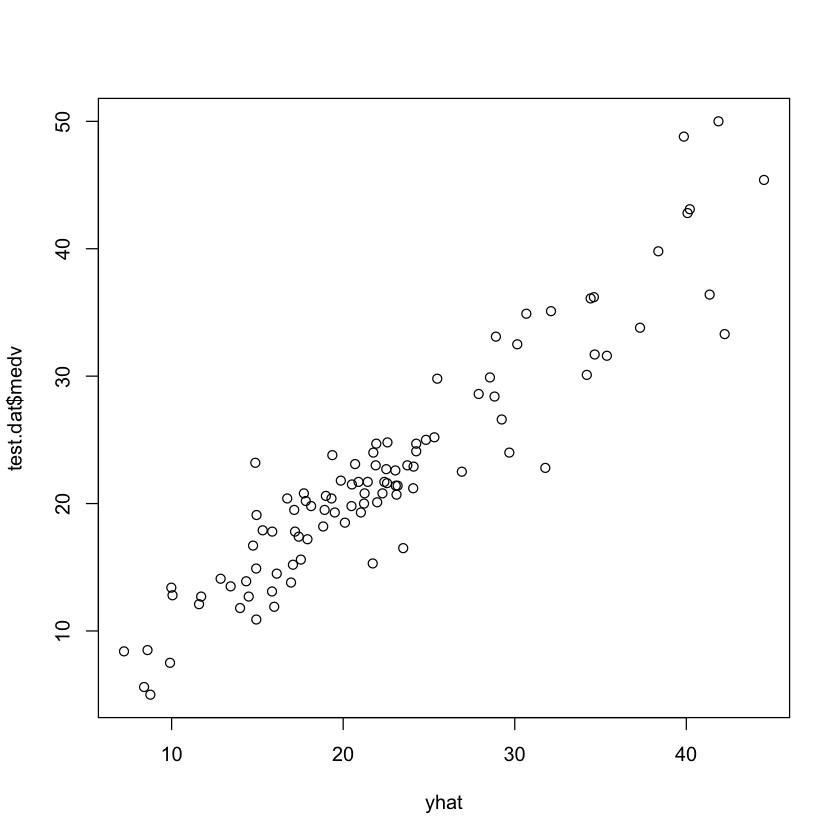

In [42]:
#to make prediction using the testing data
yhat = predict(n.fit, newdata = test.dat)

#MAE
caret::MAE(test.dat$medv,yhat)

#RMSE

caret::RMSE(test.dat$medv,yhat)

#plot the predicted value against the observed value
plot(yhat, test.dat$medv)